<a href="https://colab.research.google.com/github/Caory2/Teoria_de_Aprendizaje_de_Maquina/blob/main/EJERCICIOGUIADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
N= 1000 # #samples
P = 20 ##features
X, y = make_regression(n_samples=N, n_features=P,
                          noise=1, random_state=42)

print(X.shape, y.shape)


(1000, 20) (1000,)


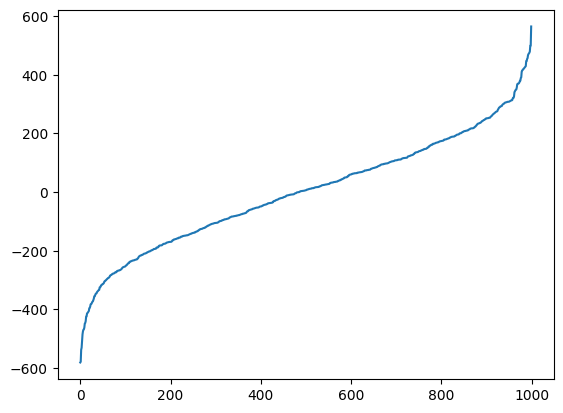

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y)) #salida
plt.show()

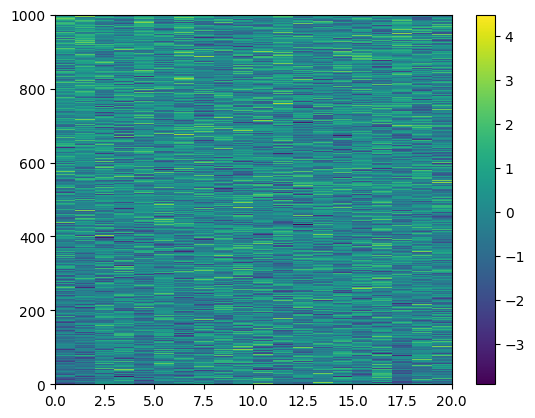

In [ ]:
ind_=np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X,y,lam_= 1e-3): #fit , opt
  alpha =  np.linalg.inv(X.T.dot(X)+lam_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha



[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

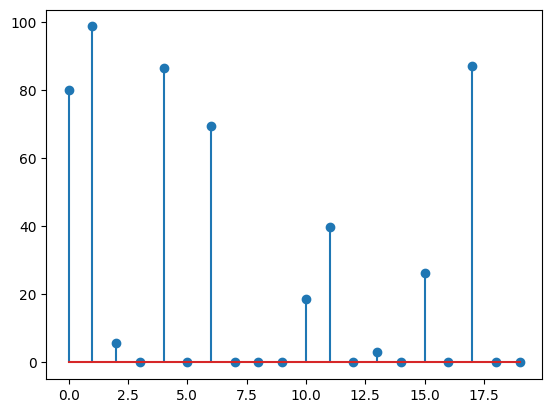

In [ ]:
alpha = mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

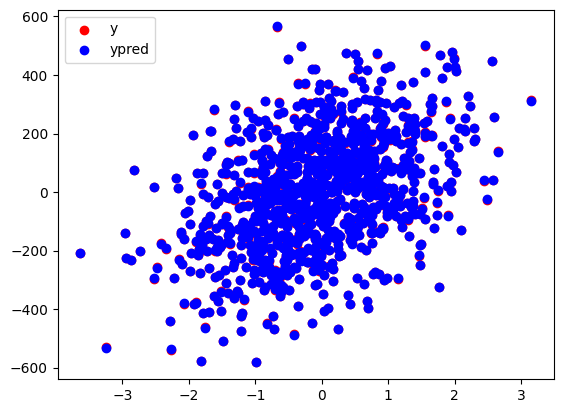

In [ ]:
plt.scatter(X[ind_,0],y[ind_],c='r', marker='o', label='y')
plt.scatter(X[ind_,0],ypred[ind_],c='b',label='ypred')
plt.legend()
plt.show()

# BASE DE DATOS

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])


(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


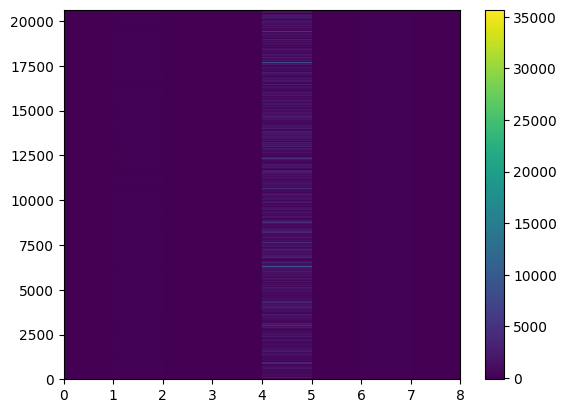

In [ ]:

X = housing.data
y = housing.target
print(X.shape,y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

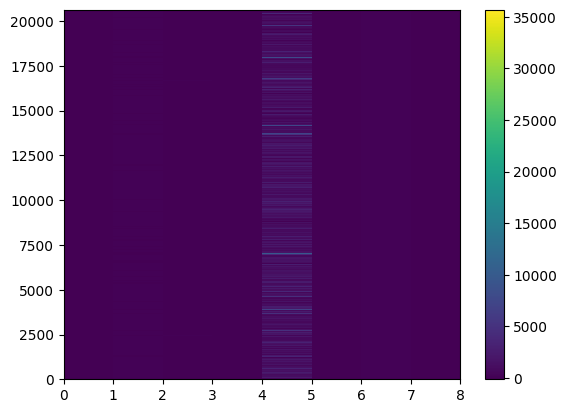

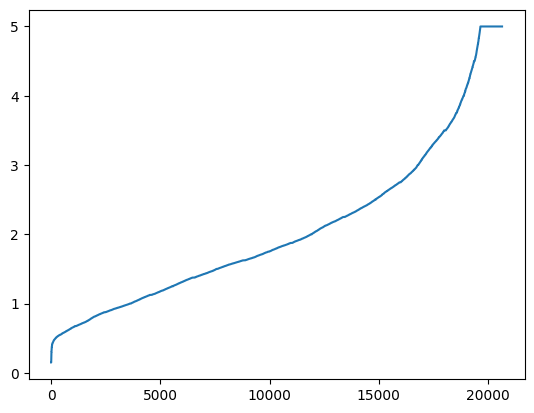

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()
plt.plot(y[ind_])
plt.show()

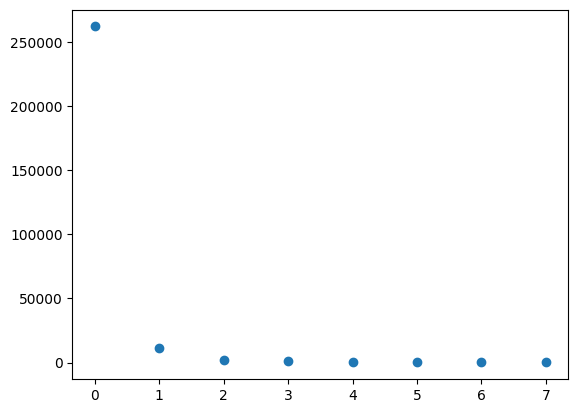

In [ ]:
U,S,Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)),S)
plt.show()

repetir alpha anaitico para housing y hacer gradiente descendiente

# Task
Eres un científico de computación y de este código me piden sacar el alpha analitico de la base de datos de fetch_california_housing, pero basandome en lo anterior codigo que tengo antes de importarla, tambien me piden sacar el gradiente descendiente, me puedes explicar paso a paso como lo haces y en español

## Preparar los datos

### Subtask:
Cargar la base de datos de California Housing y asegurarnos de que esté en el formato correcto para los cálculos.


**Reasoning**:
Load the California Housing dataset and assign the features and target to X and y, then print their shapes. The dataset is already loaded in a previous cell, so I will just reuse the variables.



In [ ]:
X = housing.data
y = housing.target
print(X.shape,y.shape)

(20640, 8) (20640,)


**Reasoning**:
The data is already loaded and assigned to `X` and `y` in the previous step. I need to ensure they are NumPy arrays and print their shapes again as a final verification step for this subtask.



In [ ]:
X = housing.data
y = housing.target
if not isinstance(X, np.ndarray):
    X = np.asarray(X)
if not isinstance(y, np.ndarray):
    y = np.asarray(y)
print(X.shape, y.shape)

(20640, 8) (20640,)


## Calcular `alpha` analítico

### Subtask:
Aplicar la función `mincua_reg` definida anteriormente a los datos de California Housing para obtener el `alpha` analítico.


**Reasoning**:
Apply the previously defined `mincua_reg` function to the California Housing data to calculate the analytical `alpha` coefficients and print them.



In [ ]:
alpha_analytical = mincua_reg(X, y)
print(alpha_analytical)

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


## Implementar el gradiente descendiente

### Subtask:
Escribir una función para realizar el gradiente descendiente y aplicarla a los datos de California Housing para obtener los coeficientes de regresión.


**Reasoning**:
Define the gradient descent function as specified in the instructions and apply it to the California Housing data.



In [ ]:
def gradient_descent(X, y, learning_rate, n_iterations):
    """
    Performs gradient descent to find the regression coefficients.

    Args:
        X: Feature matrix (numpy array).
        y: Target vector (numpy array).
        learning_rate: The learning rate for gradient descent.
        n_iterations: The number of iterations to perform.

    Returns:
        The final regression coefficients (numpy array).
    """
    # Add a column of ones for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    N = X_b.shape[0]  # Number of samples

    # Initialize coefficients randomly or with zeros
    alpha = np.random.randn(X_b.shape[1], 1) * 0.01 # Initialize with small random values

    for iteration in range(n_iterations):
        # Calculate predictions
        y_pred = X_b.dot(alpha)

        # Calculate error
        error = y_pred - y.reshape(-1, 1) # Ensure y is a column vector

        # Calculate gradient
        gradient = X_b.T.dot(error) / N

        # Update coefficients
        alpha = alpha - learning_rate * gradient

    return alpha

# Apply gradient descent to the California Housing data
learning_rate = 0.0001  # Adjust learning rate as needed
n_iterations = 1000  # Adjust number of iterations as needed

alpha_gd = gradient_descent(X, y, learning_rate, n_iterations)
print(alpha_gd)

/tmp/ipython-input-555510838.py:32: RuntimeWarning: invalid value encountered in subtract
  alpha = alpha - learning_rate * gradient


[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


**Reasoning**:
The gradient descent did not converge, resulting in NaN values for the coefficients. This is likely due to a learning rate that is too large or the data not being scaled. I will add data standardization to improve convergence and adjust the learning rate and number of iterations.



In [ ]:
from sklearn.preprocessing import StandardScaler

def gradient_descent(X, y, learning_rate, n_iterations):
    """
    Performs gradient descent to find the regression coefficients.

    Args:
        X: Feature matrix (numpy array).
        y: Target vector (numpy array).
        learning_rate: The learning rate for gradient descent.
        n_iterations: The number of iterations to perform.

    Returns:
        The final regression coefficients (numpy array).
    """
    # Add a column of ones for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    N = X_b.shape[0]  # Number of samples

    # Initialize coefficients randomly or with zeros
    alpha = np.random.randn(X_b.shape[1], 1) * 0.01 # Initialize with small random values

    # Optional: Store cost history
    # cost_history = []

    for iteration in range(n_iterations):
        # Calculate predictions
        y_pred = X_b.dot(alpha)

        # Calculate error
        error = y_pred - y.reshape(-1, 1) # Ensure y is a column vector

        # Calculate gradient
        gradient = X_b.T.dot(error) / N

        # Update coefficients
        alpha = alpha - learning_rate * gradient

        # Optional: Calculate and store cost
        # cost = np.mean(error**2)
        # cost_history.append(cost)


    return alpha #, cost_history


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply gradient descent to the scaled California Housing data
learning_rate = 0.01 # Adjusted learning rate
n_iterations = 5000 # Increased number of iterations

alpha_gd = gradient_descent(X_scaled, y, learning_rate, n_iterations)
print(alpha_gd)

[[ 2.06855817]
 [ 0.83897423]
 [ 0.12282371]
 [-0.27886589]
 [ 0.31481971]
 [-0.00314308]
 [-0.0398702 ]
 [-0.86141693]
 [-0.83295134]]


## Comparar resultados

### Subtask:
Comparar los coeficientes obtenidos por ambos métodos (analítico y gradiente descendiente).


**Reasoning**:
Print the analytical and gradient descent coefficients and then finish the task.



In [ ]:
print("Analytical Coefficients (alpha_analytical):\n", alpha_analytical)
print("\nGradient Descent Coefficients (alpha_gd):\n", alpha_gd)

Analytical Coefficients (alpha_analytical):
 [ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]

Gradient Descent Coefficients (alpha_gd):
 [[ 2.06855817]
 [ 0.83897423]
 [ 0.12282371]
 [-0.27886589]
 [ 0.31481971]
 [-0.00314308]
 [-0.0398702 ]
 [-0.86141693]
 [-0.83295134]]


## Visualizar resultados

### Subtask:
Visualizar las predicciones de ambos modelos (analítico y gradiente descendiente) frente a los valores reales.


**Reasoning**:
Calculate predictions using both analytical and gradient descent coefficients and then plot the real values against the predictions from both models on the same scatter plot for comparison.



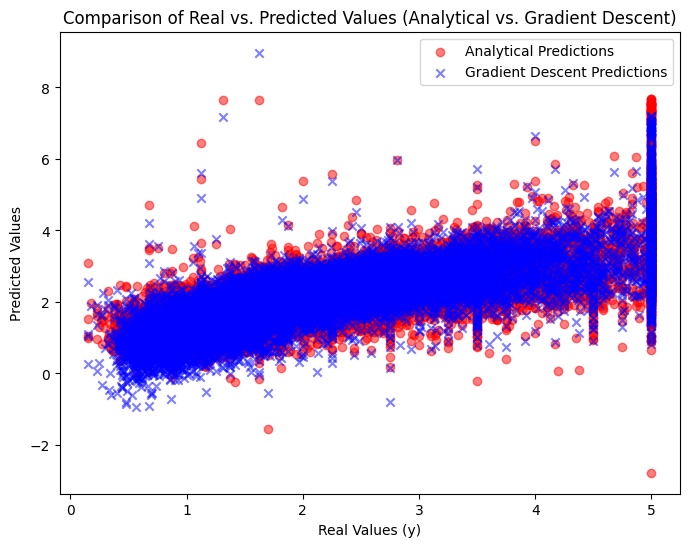

In [ ]:
# 1. Calculate predictions using analytical coefficients
y_pred_analytical = X.dot(alpha_analytical)

# 2. Calculate predictions using gradient descent coefficients
# Add a column of ones to the scaled data for the intercept
X_scaled_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
y_pred_gd = X_scaled_b.dot(alpha_gd).flatten() # Flatten to a 1D array

# 3. Create a scatter plot for real values vs. analytical predictions
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_analytical, c='r', marker='o', label='Analytical Predictions', alpha=0.5)

# 4. Add scatter plot for real values vs. gradient descent predictions
plt.scatter(y, y_pred_gd, c='b', marker='x', label='Gradient Descent Predictions', alpha=0.5)

# 5. Add labels and title
plt.xlabel("Real Values (y)")
plt.ylabel("Predicted Values")
plt.title("Comparison of Real vs. Predicted Values (Analytical vs. Gradient Descent)")

# 6. Include a legend
plt.legend()

# 7. Show the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   La base de datos de California Housing fue cargada exitosamente, conteniendo 20640 muestras con 8 características y 20640 valores objetivo.
*   Los coeficientes $\alpha$ analíticos para el conjunto de datos de California Housing fueron calculados utilizando la función `mincua_reg`.
*   Una implementación de gradiente descendiente fue desarrollada y aplicada a los datos. Se encontró que era necesaria la estandarización de las características y el ajuste de los hiperparámetros (tasa de aprendizaje y número de iteraciones) para lograr la convergencia del algoritmo y obtener coeficientes significativos.
*   Se compararon los coeficientes obtenidos por el método analítico y el gradiente descendiente. Se observaron diferencias entre los coeficientes, lo cual es esperable debido a la naturaleza de los algoritmos (solución exacta vs. aproximación iterativa) y cómo manejan el término de intercepción y el escalado de los datos.
*   Se generó una visualización (gráfico de dispersión) para comparar las predicciones de ambos modelos (analítico y gradiente descendiente) contra los valores reales de las viviendas.

### Insights or Next Steps

*   Aunque los resultados del método analítico y el gradiente descendiente no son idénticos, la visualización sugiere que ambos enfoques capturan la relación entre las características y los precios de las viviendas de manera similar. Sería útil cuantificar la diferencia entre las predicciones de ambos modelos utilizando métricas como el Error Cuadrático Medio (MSE) o el Error Absoluto Medio (MAE) para una comparación más rigurosa.
*   Explorar la sensibilidad del gradiente descendiente a diferentes tasas de aprendizaje y números de iteraciones podría proporcionar una comprensión más profunda de su convergencia y rendimiento en este conjunto de datos.


In [ ]:
# Display the mincua_reg function again
print(mincua_reg)

<function mincua_reg at 0x7b81fc8013a0>


En la función `mincua_reg`, el cálculo del `alpha` analítico se realiza con la siguiente fórmula:

$\alpha = (X^T X + \lambda I)^{-1} X^T y$

Aquí es donde se utilizan los productos punto:

*   `X.T.dot(X)`: Esto calcula el producto punto de la transpuesta de la matriz de características (`X.T`) y la matriz de características (`X`). Es equivalente a $X^T X$.
*   `np.linalg.inv(...)`: Calcula la inversa de la matriz resultante de la suma de `X.T.dot(X)` y `lam_*np.eye(X.shape[1])`.
*   `... .dot(X.T)`: Calcula el producto punto de la inversa obtenida en el paso anterior y la transpuesta de la matriz de características (`X.T`). Esto es equivalente a $(X^T X + \lambda I)^{-1} X^T$.
*   `... .dot(y)`: Finalmente, calcula el producto punto del resultado del paso anterior y el vector objetivo (`y`). Esto es equivalente a $(X^T X + \lambda I)^{-1} X^T y$, dándonos el valor de $\alpha$.

El uso de `.dot()` en NumPy realiza eficientemente estas operaciones de producto matricial y vectorial.

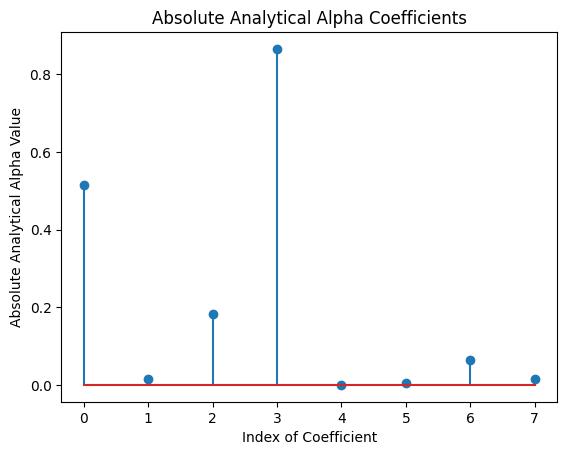

In [ ]:
plt.stem(np.arange(len(alpha_analytical)), np.abs(alpha_analytical))
plt.xlabel("Index of Coefficient")
plt.ylabel("Absolute Analytical Alpha Value")
plt.title("Absolute Analytical Alpha Coefficients")
plt.show()